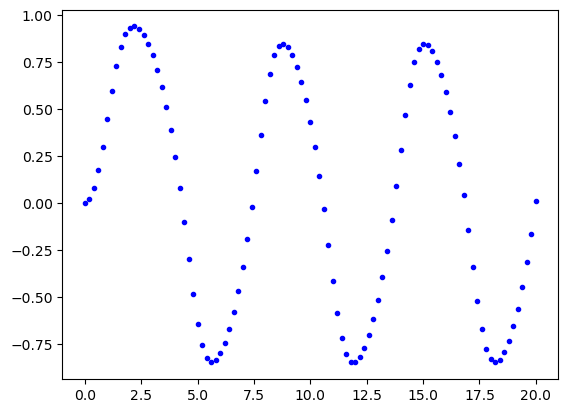

In [1]:
# code courtesy of Adam Dempsey
# modified for PHY1055 by Oisín Creaner

# import libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

# define the nonlinear derivative function
def nonlinear1(t, y):
    """
    Calculates the derivative value for the differential equation given in experiment R1
    :param t: a float for the time variable
    :param y: a float for the dependent variable
    :return dydt a float for the derivative of the differential equation:
    """

    # Calculate the derivative explicitly
    dydt = -y**3 + np.sin(t)

    # return the value
    return dydt


def main():
    """
    A main function used to ensure that the code is portable. By using if __name__ == '__main__': main() we can ensure
    that python will not execute the code when functions or methods in this module are imported, only if we run it
    directly. At this point, this structure isn't needed, but it's a good habit to get into.
    :return:
    """
    # define the initial variables
    y0 = np.array([0])  # initial state at t = 0
    t0 = 0  # initial time
    tf = 20  # final time
    n = 101  # Number of points at which output will be evaluated (note 101 points are needed for 100 spaces)
    # Note: this does not mean the integrator will take only n steps SciPy
    # will control this to control the error in the solution

    # create a numpy array of n times linearly spaced between t0 and tf
    t = np.linspace(t0, tf, n)

    # Call the RK integrator and return the solution in the array "result"
    # Note that because the brackets aren't closed, the method integrate.solve_ivp()
    # behaves as though it was on just one line.
    result = integrate.solve_ivp(fun=nonlinear1,  # The function defining the derivative
                                 t_span=(t0, tf),  # Initial and final times
                                 y0=y0,  # Initial state
                                 method="RK45",  # Integration method
                                 t_eval=t)  # Time points for result to be reported

    # Read the solution and time from the array returned by Scipy
    y = result.y[0]
    t = result.t

    # plot the solution
    plt.plot(t,y,'b.')
    plt.show()

if __name__ == '__main__':
    main()

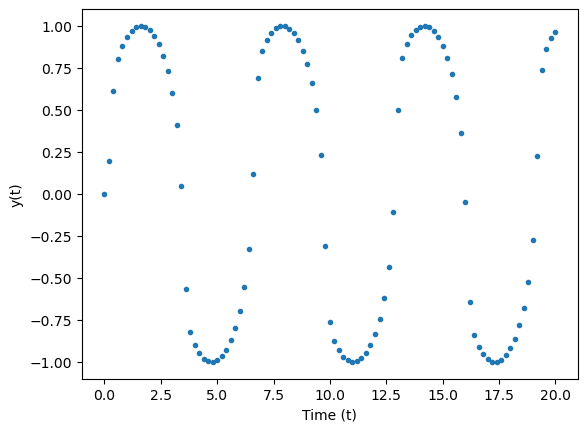

In [29]:
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt

# Define the nonlinear function with additional parameters a and b
def nonlinear(t, y, a, b):
    dydt = -a * y**3 + b * np.sin(t)
    return dydt

# Initial conditions
y0 = [0]  # initial state at t = 0
t0 = 0  # initial time
tf = 20  # final time
n = 101  # Number of points at which output will be evaluated

# Parameters a and b
a = 10
b = 10

# Generate time points
t = np.linspace(t0, tf, n)

# Call the RK integrator and return the solution
result = integrate.solve_ivp(fun=nonlinear,  # The function defining the derivative
                             t_span=(t0, tf),  # Initial and final times
                             y0=y0,  # Initial state
                             args=(a, b),  # Parameters for the function
                             method="RK45",  # Integration method
                             t_eval=t)  # Time points for result to be reported

# Read the solution and time from the array returned by Scipy
y = result.y[0]
t = result.t

# Plot the solution
plt.plot(t, y, '.')
plt.xlabel('Time (t)')
plt.ylabel('y(t)')
#plt.title('Solution of the Nonlinear ODE')
plt.show()


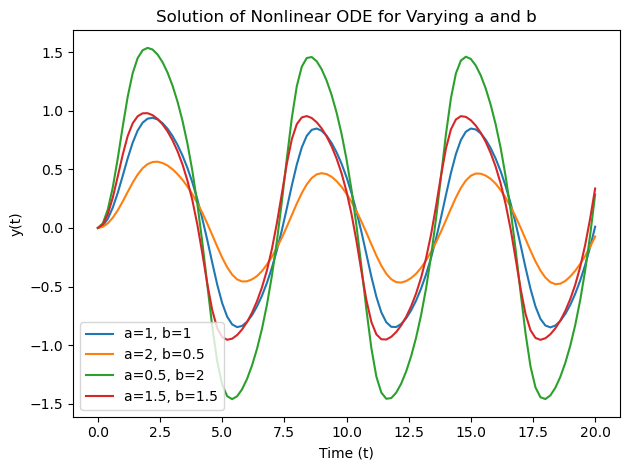

In [33]:
# code courtesy of Adam Dempsey
# modified for PHY1055 by Oisín Creaner
# further modified to include varying a and b values by [Your Name]

# import libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

# define the nonlinear derivative function
def nonlinear1(t, y, a, b):
    """
    Calculates the derivative value for the differential equation.
    :param t: a float for the time variable
    :param y: a float for the dependent variable
    :param a: parameter a
    :param b: parameter b
    :return dydt: a float for the derivative of the differential equation:
    dydt = -a*y^3 + b*sin(t)
    """
    dydt = -a * y**3 + b * np.sin(t)
    return dydt


def main():
    """
    Main function to solve the nonlinear ODE for varying values of a and b, and plot the results.
    """

    # define the initial conditions
    y0 = np.array([0])  # initial state at t = 0
    t0 = 0  # initial time
    tf = 20  # final time
    n = 101  # number of points

    # create a numpy array of n times linearly spaced between t0 and tf
    t = np.linspace(t0, tf, n)

    # List of (a, b) values to try
    parameter_sets = [(1, 1), (2, 0.5), (0.5, 2), (1.5, 1.5)]

    # Create a figure for the plot
    plt.figure()

    # Loop through each (a, b) pair
    for a, b in parameter_sets:
        # Call the RK integrator and return the solution
        result = integrate.solve_ivp(fun=nonlinear1,  # function for derivative
                                     t_span=(t0, tf),  # initial and final times
                                     y0=y0,  # initial state
                                     args=(a, b),  # pass the parameters a and b
                                     method="RK45",  # integration method
                                     t_eval=t)  # time points for result

        # Read the solution
        y = result.y[0]

        # Plot the solution for this pair of a, b
        plt.plot(t, y, label=f'a={a}, b={b}')

    # Add labels, title, and legend
    plt.xlabel('Time (t)')
    plt.ylabel('y(t)')
    plt.title('Solution of Nonlinear ODE for Varying a and b')
    plt.legend()

    # Show the plot
    plt.tight_layout()
    plt.show()

if __name__ == '__main__':
    main()
